In [125]:
%reset -f

import pandas as pd
import numpy as np
from wavhandler import *
import matplotlib.pyplot as plt

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Measure "cleanliness" of data

### Loading one dataset

In [126]:
dname = 'pcfruit'
d1 = Dataset(dname)
d1.read(setting='psd_dB')
print("Dataset classes: {}\n".format(d1.target_classes))
selection = d1.target_classes[1]
print(f"Selecting {selection}")
d1.select_class(selection)

Read filenames in 0.01 seconds.
Loaded data into matrix in 0.76 seconds.
Dataset classes: ['C. pomonella', 'D. suzukii']

Selecting D. suzukii


### Calculating the standard deviation of psd and its difference series

In [127]:
df = d1.X
df['std_diff'] = d1.X.apply(lambda x: x.diff().std(), axis=1)
df['std_diff'].sort_values(ascending=False).head()

2069    7.230045
2010    6.938451
1720    6.922211
1537    6.917763
1287    6.739315
Name: std_diff, dtype: float64

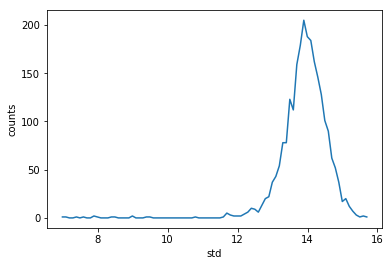

In [128]:
sub = pd.DataFrame()
sub['std_diff'] = df['std_diff']
sub['std'] = d1.X.apply(lambda x: x.std(), axis=1)
np_hist(sub, 'std')

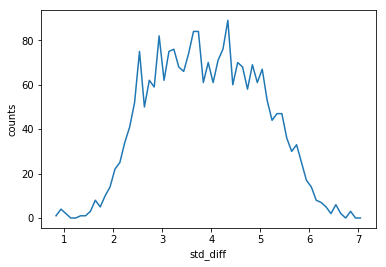

In [129]:
np_hist(sub, 'std_diff')

### Working with the raw signal

In [3]:
d1 = Dataset(dname)
d1.read(setting='read')
print("Dataset classes: {}\n".format(d1.target_classes))
selection = d1.target_classes[1]
print(f"Selecting {selection}")
d1.select_class(selection)

df_raw = d1.X

Read filenames in 0.01 seconds.
Loaded data into matrix in 0.44 seconds.
Dataset classes: ['C. pomonella', 'D. suzukii']

Selecting D. suzukii


In [701]:
# plt.figure(figsize=(30,5))
# plt.subplot(1,2,1);plt.title('Example of a good signal');
# d1.X.iloc[5817,:].plot(ylim=(-.1,.1))
# plt.subplot(1,2,2); plt.title('Random signal')
# d1.X.iloc[np.random.randint(0,d1.X.shape[0]),:].plot(ylim=(-.1,.1))

#### Comparing std with std_diff

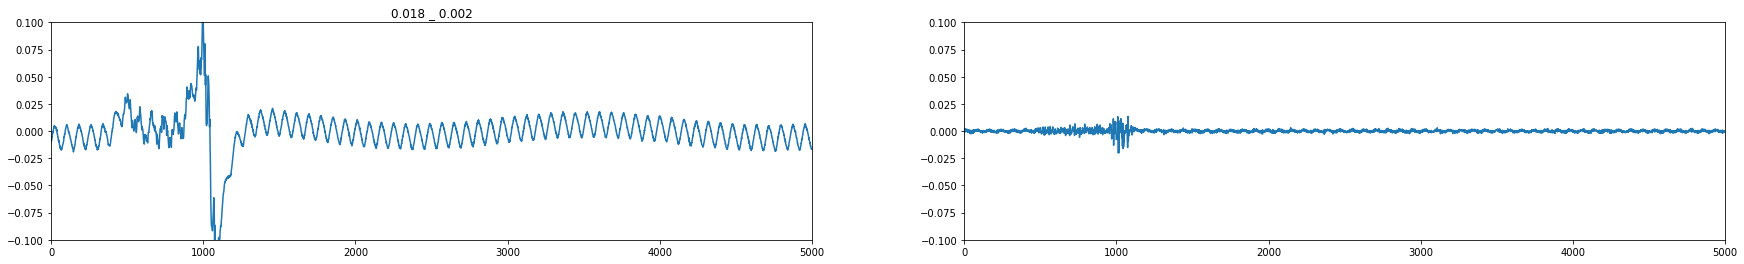

In [124]:
sig = df_raw.iloc[np.random.randint(0,df_raw.shape[0]),:]
plt.figure(figsize=(30,4))
plt.subplot(1,2,1); sig.plot(ylim=(-.1,.1))
plt.title("{:.3f} _ {:.3f}".format(sig.std(), sig.diff().std()))
plt.subplot(1,2,2); sig.diff().plot(ylim=(-.1,.1))

In [670]:
clean = df[df['std_diff'] > df['std_diff'].quantile(0.99)].iloc[:,:-1]
clean_raw = df_raw.loc[clean.index]
print(clean.shape, clean_raw.shape)

(137, 129) (137, 5000)


In [671]:
noisy = df[df['std_diff'] <= df['std_diff'].quantile(0.99)].iloc[:,:-1]
noisy_raw = df_raw.loc[noisy.index]
print(noisy.shape, noisy_raw.shape)

(13482, 129) (13482, 5000)


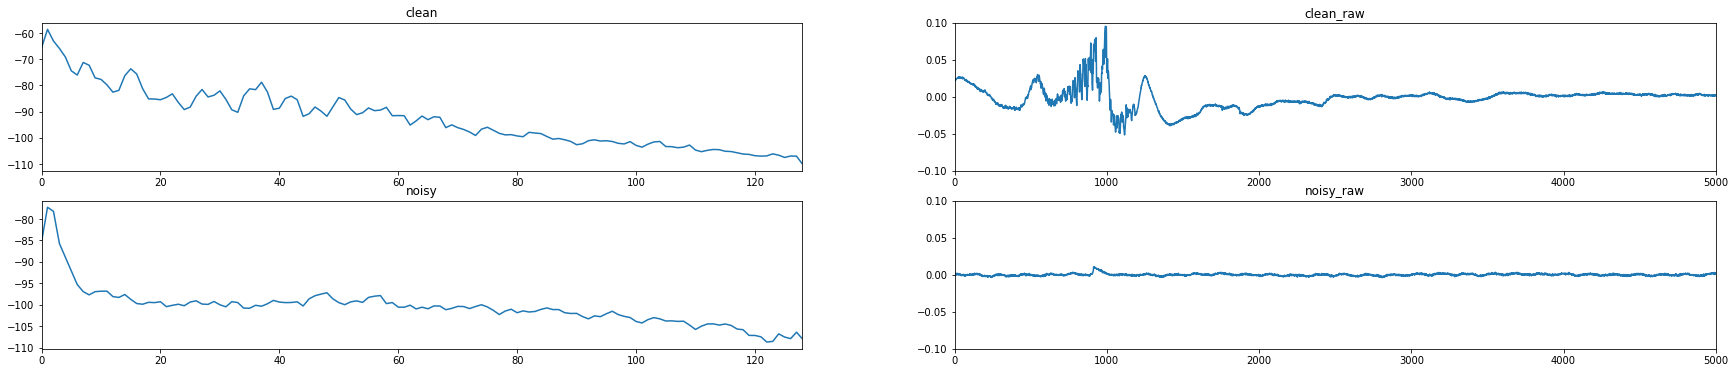

In [685]:
plt.figure(figsize=(30,6))

plt.subplot(2,2,1)
plt.title('clean')
rdm_clean = np.random.randint(0, clean.shape[0])
clean.iloc[rdm_clean,:].plot()#ylim=(-.1,.1))

plt.subplot(2,2,2)
plt.title('clean_raw')
clean_raw.iloc[rdm_clean,:].plot(ylim=(-.1,.1))

plt.subplot(2,2,3)
plt.title('noisy')
rdm_noisy = np.random.randint(0, noisy.shape[0])
plt.title('noisy')
noisy.iloc[rdm_noisy,:].plot()#ylim=(-.1,.1))

plt.subplot(2,2,4)
plt.title('noisy_raw')
noisy_raw.iloc[rdm_noisy,:].plot(ylim=(-.1,.1))

## Checking STD_DIFF distribution

Read filenames in 0.09 seconds.
Loaded data into matrix in 5.46 seconds.
Dataset classes: ['Melanogaster', 'Suzukii']

Selecting Suzukii


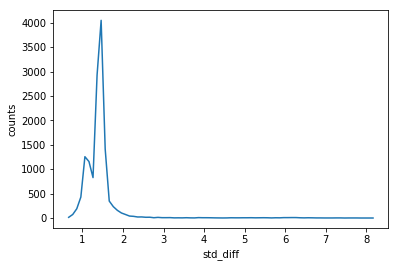

In [673]:
d1 = Dataset('thomas')
d1.read(setting='psd_dB')
print("Dataset classes: {}\n".format(d1.target_classes))
selection = d1.target_classes[1]
print(f"Selecting {selection}")
d1.select_class(selection)
df = d1.X
df['std_diff'] = d1.X.apply(lambda x: x.diff().std(), axis=1)

np_hist(df,'std_diff',res=0.1)
# df['std_diff'].hist()

In [312]:
# # dataset.overview()
# df = dataset.X
# sub = pd.DataFrame()
# sub['diff_std'] = df.apply(lambda x: x.diff().std(), axis=1)
# sub['max'] = dataset.X.max(axis=1)
# sub['min'] = dataset.X.min(axis=1)
# sub.head()

# New Sensor

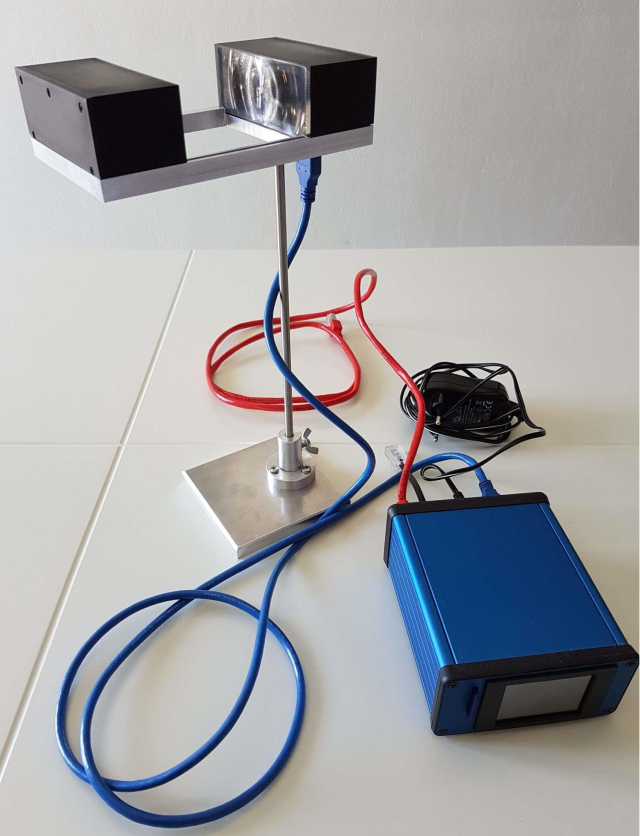

In [478]:
from IPython.display import Image
PATH = "./temp_data/new_sensor.png"
Image(filename = PATH, width=300, height=50)

Read filenames in 0.00 seconds.
Loaded data into matrix in 0.01 seconds.
['D190502134403', 'D190502150648', 'D190502153507', 'info.txt', 'wavs']


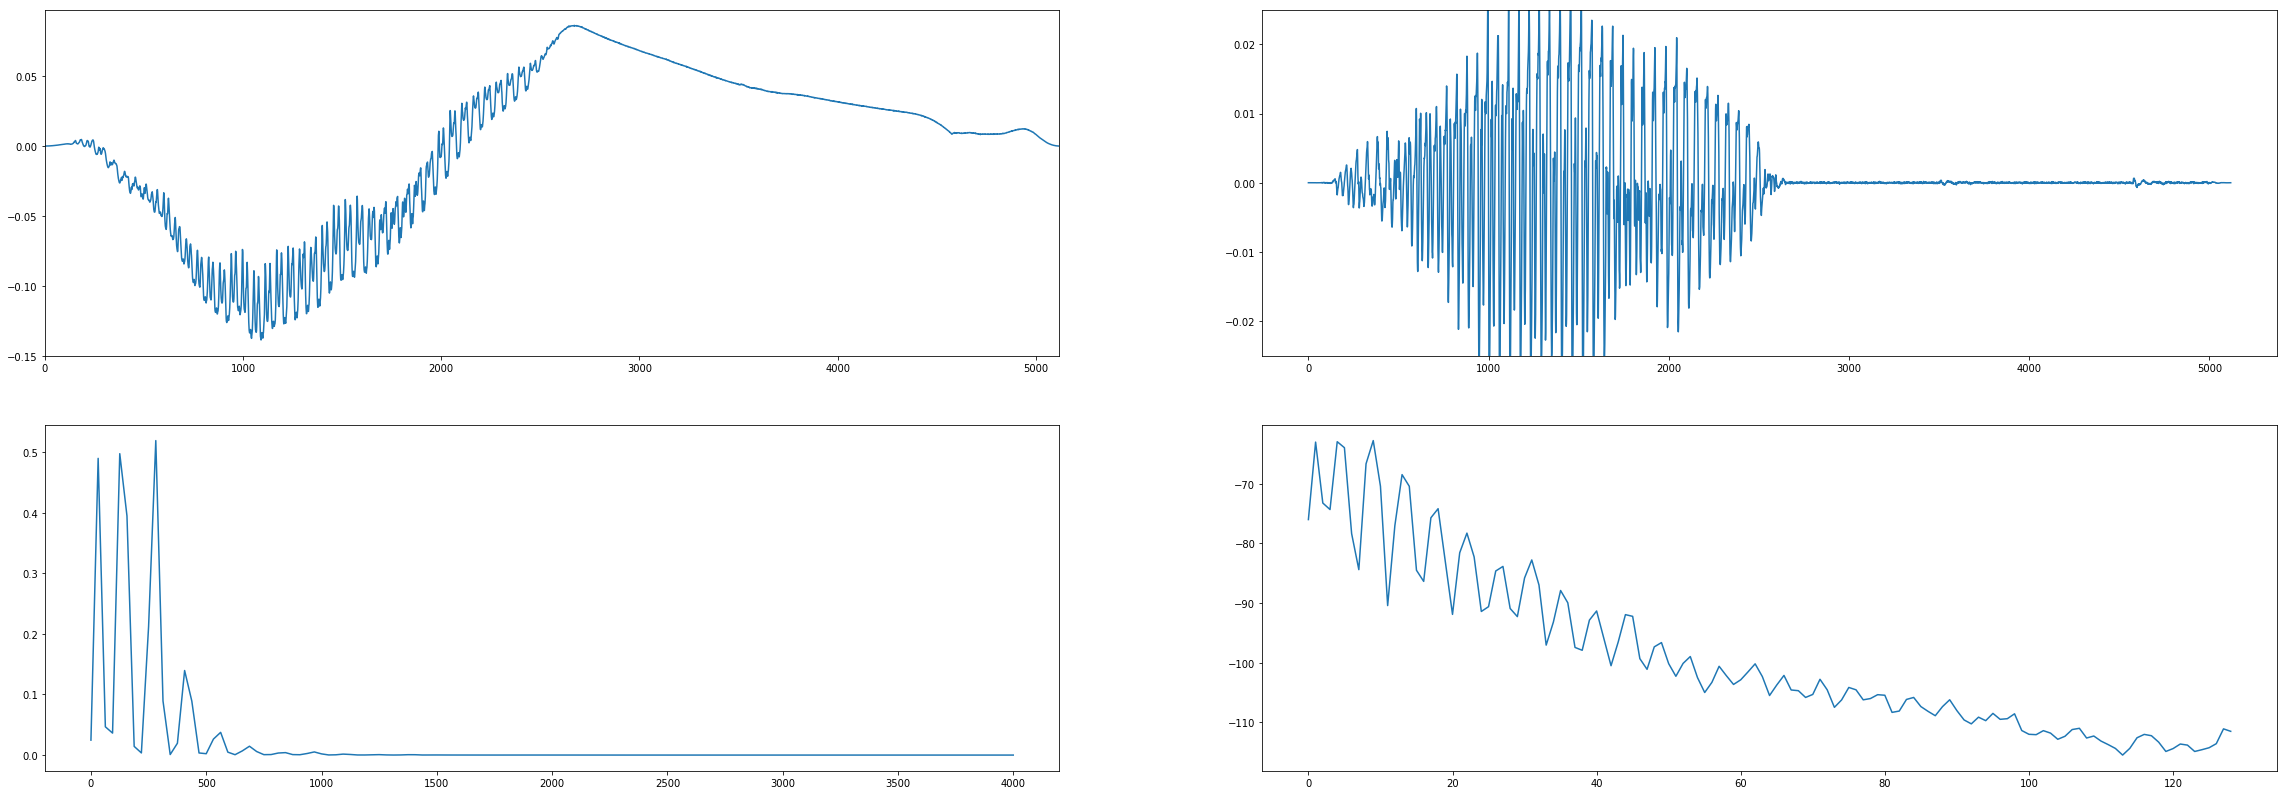

In [481]:
dataset = Dataset('new_sensor')
dataset.read(setting='read')
print(dataset.target_classes)
dataset.select_class('D190502153507')

df = dataset.X

rdm = np.random.randint(0,df.shape[0])
plt.figure(figsize=(40,14))
plt.subplot(2,2,1)
sig = df.iloc[rdm,:]
sig.plot()
plt.subplot(2,2,2)
plt.ylim(-.025,.025)
plt.plot(butter_bandpass_filter(sig, L_CUTOFF,H_CUTOFF,F_S,B_ORDER))
plt.subplot(2,2,3)
f = power_spectral_density(sig)
plt.plot(f.frequency, f.pow_amp)
plt.subplot(2,2,4)
plt.plot(transform_data(sig.values))

Read filenames in 0.09 seconds.
Loaded data into matrix in 2.98 seconds.
['Melanogaster', 'Suzukii']
5817


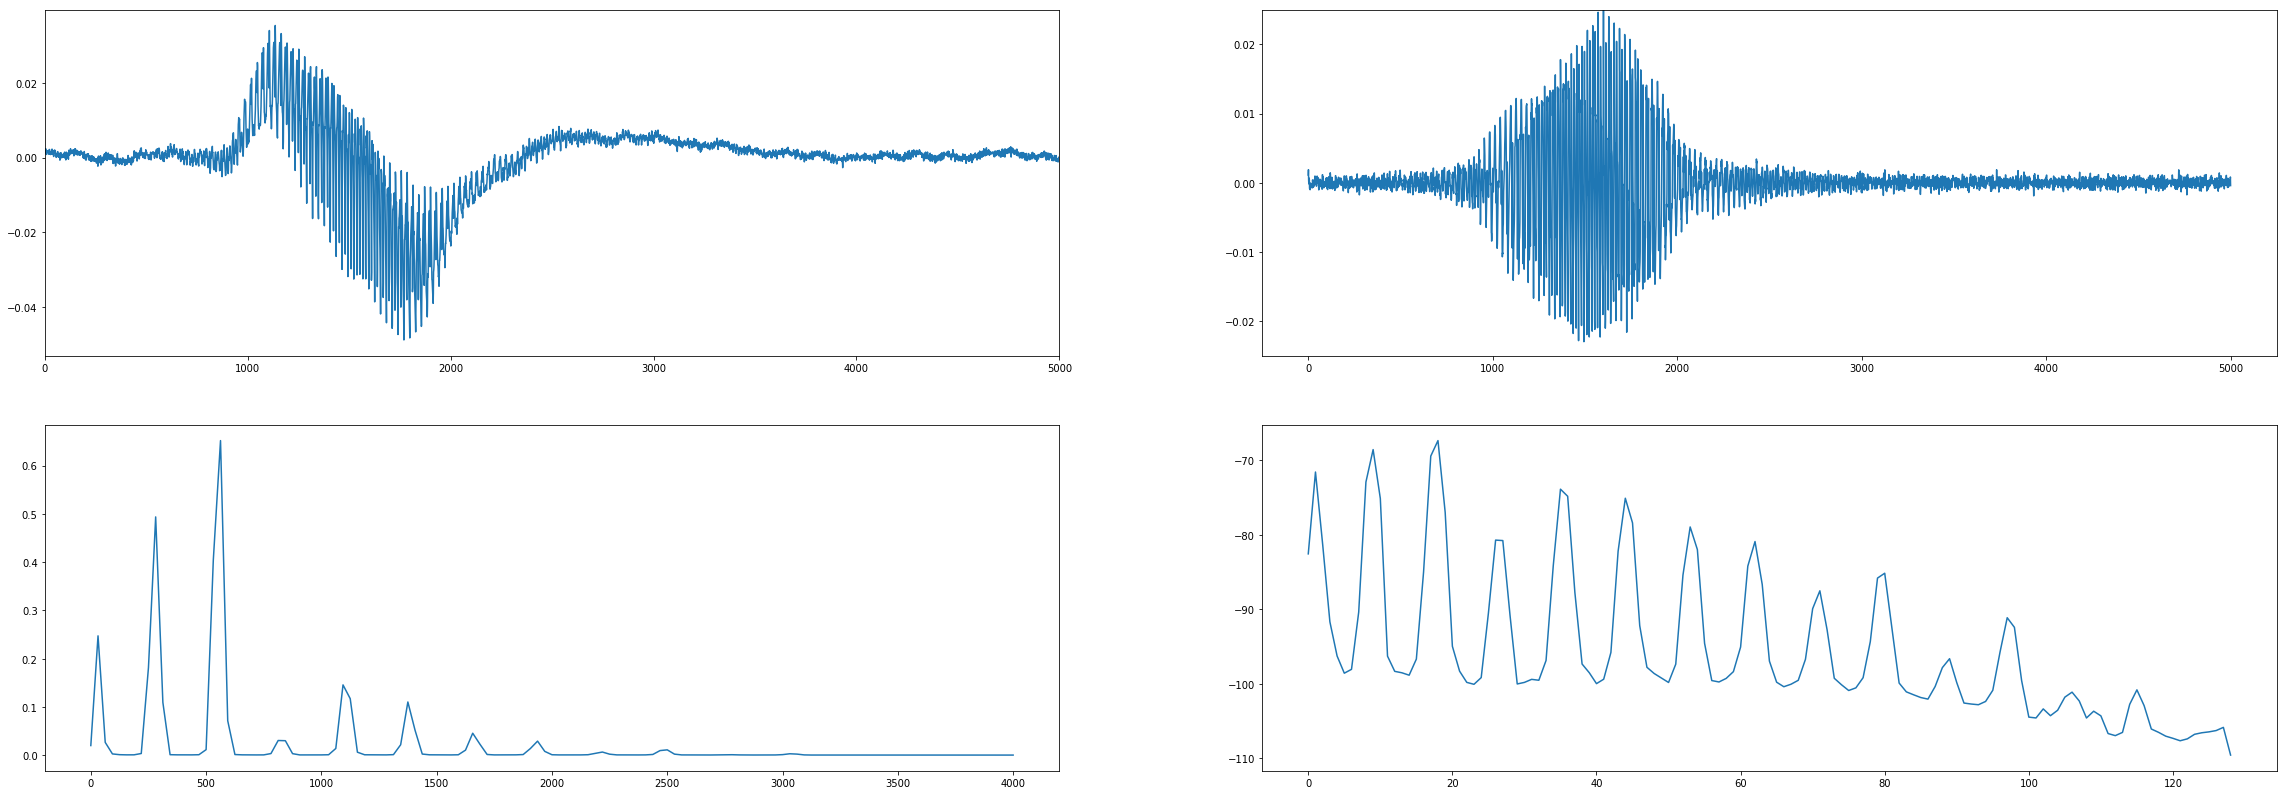

In [304]:
dataset2 = Dataset('thomas')
dataset2.read(setting='read')
print(dataset2.target_classes)
dataset2.select_class('Suzukii')

df2 = dataset2.X
rdm = 5817#np.random.randint(0,df2.shape[0])
print(rdm)
plt.figure(figsize=(40,14))
plt.subplot(2,2,1)
sig = df2.iloc[rdm,:]
sig.plot()
plt.subplot(2,2,2)
plt.ylim(-0.025,.025)
plt.plot(butter_bandpass_filter(sig, L_CUTOFF,H_CUTOFF,F_S,B_ORDER))
plt.subplot(2,2,3)
f = power_spectral_density(sig)
plt.plot(f.frequency, f.pow_amp)
plt.subplot(2,2,4)
plt.plot(transform_data(sig.values))

In [11]:
# inds = (sub['diff_std'] > 0.003).astype(int).values
# df = df.iloc[inds,:]
# y = dataset.y[inds]
# df.iloc[5,:].plot()

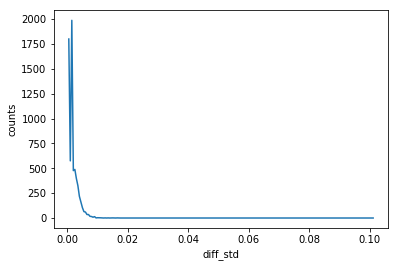

In [516]:
res = 0.0005
col = 'diff_std'
values = sub[col]
_bins, _edges = np.histogram(values, np.arange(sub[col].min(), sub[col].max(), res))
plt.plot(_edges[:len(_edges)-1], _bins)
plt.ylabel('counts'); plt.xlabel(col)
plt.show()

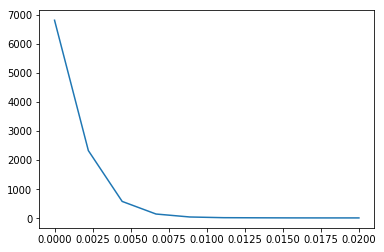

In [517]:
zz = []
myrange = np.linspace(0.,0.02,10)
for i in myrange:
    zz.append(sub[sub['diff_std'] > i].shape[0])
plt.plot(myrange, zz)

Text(0.5,1,'0.0011321526536175494_5')

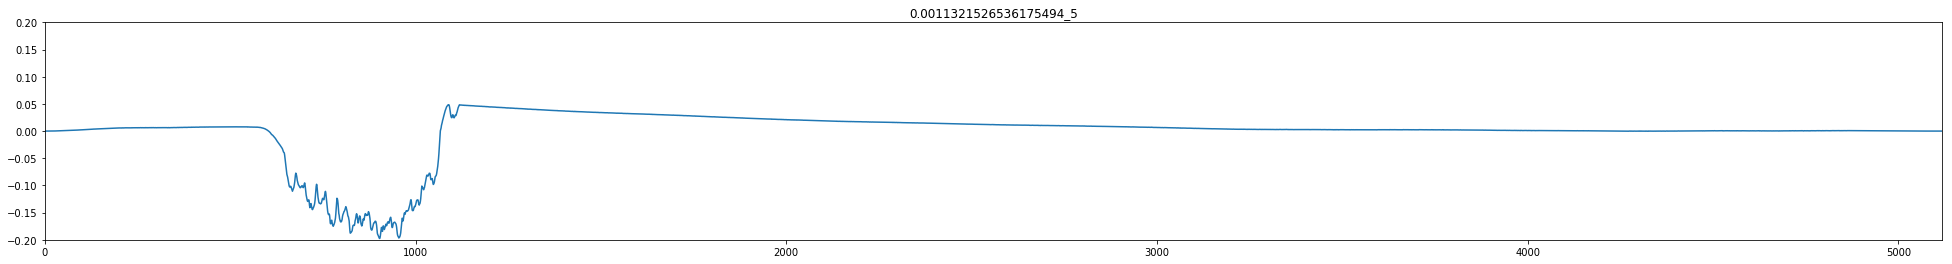

In [43]:
rdm = np.random.randint(0,17)
# rdm = 32
plt.figure(figsize=(34,4))
plt.ylim(-.2, .2)
df.iloc[rdm,:-1].plot()
plt.title(str(df.iloc[rdm,:-1].diff().std())+'_'+str(rdm))
# df[df['diff_std'] > 0.0035]

In [62]:
np.array_equal(df.iloc[2,:].values, df.iloc[4,:].values)# 

True

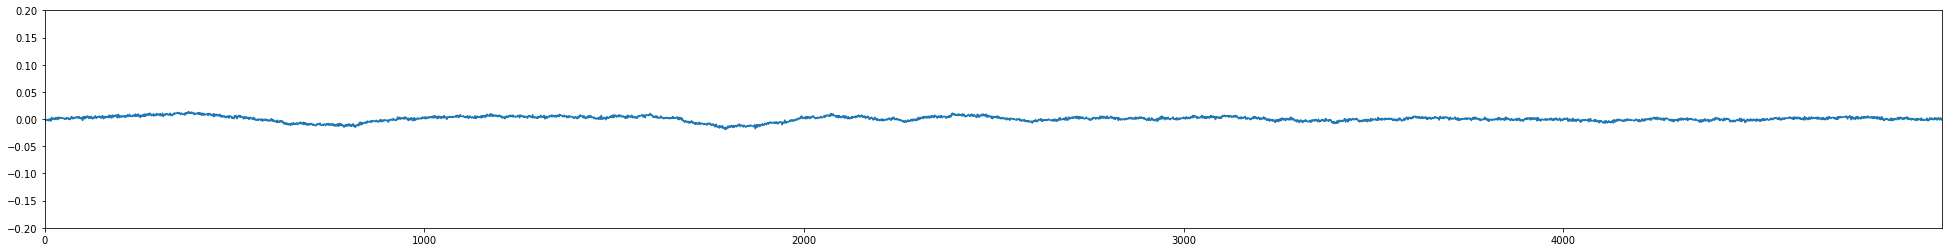

In [519]:
rdm = np.random.randint(0,31)
plt.figure(figsize=(34,4))
plt.ylim(-.2,.2)
df.iloc[rdm,:-1].plot()
# [df['diff_std']df > 0.0035]

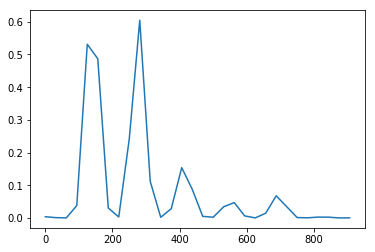

In [342]:
rdm = np.random.randint(0,31)
sub = power_spectral_density(df.iloc[rdm,:-1].values, bandpass=True)
sub = sub.iloc[:30,:]
plt.plot(sub.frequency,sub.pow_amp)

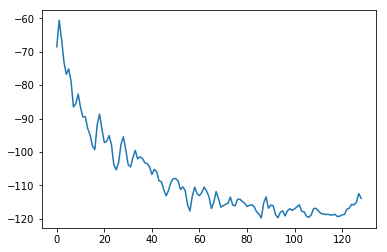

In [343]:
rdm = np.random.randint(0,31)

plt.plot(transform_data(df.iloc[rdm,:-1].values))

In [593]:
from utils_train import make_classification_ml, make_classification_conv1d

data = Dataset('thomas')
data.read(setting='psd', labels='nr')
make_classification_conv1d(data.X, data.y, )

Read filenames in 0.11 seconds.


Instructions for updating:
Colocations handled automatically by placer.


Loaded data into matrix in 7.14 seconds.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Train on 14709 samples, validate on 3678 samples
Epoch 1/100
14709/14709 [==============================] - 13s 887us/step - loss: 0.3537 - acc: 0.8701 - val_loss: 0.3558 - val_acc: 0.8494

Epoch 00001: val_acc improved from -inf to 0.84937, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/test_.h5
Epoch 2/100
14709/14709 [==============================] - 10s 647us/step - loss: 0.2878 - acc: 0.8899 - val_loss: 0.2774 - val_acc: 0.8959

Epoch 00002: val_acc improved from 0.84937 to 0.89587, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/test_.h5
Epoch 3/100
14709/14709 [==============================] - 10s 649us/step - loss: 0.2714 - acc: 0.8954 - val_loss: 0.2622 - val_acc: 0.9010

Epoch 00003: val_acc improved from 0.89587 to 0.90103, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/test_.h5
Epoch 4/100
14709/14709 [==============================] - 10s 653us/step - loss: 0.2651 - acc: 0.8967 - val_loss: 0.3374 -